# Time Series - Part 3

#### 🎯 Learning Goals

1. **Point Forecasting** on paper. 
2. **Point Forecasting** in action.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA

## Point Forecasting

The idea of point forecasting is to generate a prediction of the future, $T + h$,  using the information available up to period $T$. The forecast is is denoted by $\widehat{y}_{T+h}$. 

As you discussed in lecture, the forecast is formed by minimizing the expected future loss given current information

$$\arg \min _{\hat{y}_{T+h}} \mathbb{E}_{T} l\left(y_{T+h}, \hat{y}_{T+h}\right).$$

#### ➡️ ✏️ Task 1 

Assume that the loss function is quadratic, i.e. $$l\left(y_{T+h}, \hat{y}_{T+h}\right)=\left(y_{T+h}-\hat{y}_{T+h}\right)^{2}.$$ Show that

$$\mathbb{E}_{T}\left[y_{T+h}\right]=\arg \min _{\hat{y}_{T+h}} \mathbb{E}_{T} l\left(y_{T+h}, \hat{y}_{T+h}\right).$$

We want to minimize the expected squared error:

$$
\mathbb{E}_{T}[(y_{T+h} - \hat{y}_{T+h})^2] = \int_{-\infty}^{\infty} (y_{T+h} - \hat{y}_{T+h})^2 f_{y_{T+h}|\mathcal{I}_T}(y|\mathcal{I}_T) \, dy
$$

where $\mathcal{I}_T$ represents the information set available until period $T$. This expression aims to estimate/forecast $y_{T+h}$ based on the information set $\mathcal{I}_T$. Expanding the square, we obtain:

$$
\mathbb{E}_{T}[(y_{T+h} - \hat{y}_{T+h})^2] = \int_{-\infty}^{\infty} y^2 f_{y_{T+h}|\mathcal{I}_T}(y|\mathcal{I}_T) \, dy - 2\hat{y}_{T+h} \int_{-\infty}^{\infty} y f_{y_{T+h}|\mathcal{I}_T}(y|\mathcal{I}_T) \, dy + \left[ \hat{y}_{T+h} \right]^2 \int_{-\infty}^{\infty} f_{y_{T+h}|\mathcal{I}_T}(y|\mathcal{I}_T) \, dy
$$

The first term does not contain $\hat{y}_{T+h}$, so it does not affect minimization and can be ignored. The integral in the second term is the conditional expected value of $y_{T+h}$ given $\mathcal{I}_T$, and the integral in the last term is equal to 1.

Thus, we rewrite the expression as:

$$
\arg \min_{\hat{y}_{T+h}} \mathbb{E}_{T}[(y_{T+h} - \hat{y}_{T+h})^2] = \arg \min_{\hat{y}_{T+h}} \left\{ -2\hat{y}_{T+h} \, \mathbb{E}_{T}(y_{T+h} | \mathcal{I}_T) + \left[ \hat{y}_{T+h} \right]^2 \right\}
$$

Taking the derivative with respect to $\hat{y}_{T+h}$, we get:

$$
\frac{d}{d\hat{y}_{T+h}} \left( -2\hat{y}_{T+h} \, \mathbb{E}_{T}(y_{T+h} ) + \left[ \hat{y}_{T+h} \right]^2 \right) = -2 \mathbb{E}_{T}(y_{T+h} ) + 2\hat{y}_{T+h}
$$

Setting this derivative to zero for minimization, we find:

$$
\hat{y}_{T+h} = \mathbb{E}_{T}(y_{T+h}).
$$

The second derivative is equal to $2 > 0$, which confirms that this solution is a minimum.


#### ➡️ ✏️ Task 2

Suppose you have a time series model of the form

$$y_t = c + \varepsilon_t + \theta_1 \varepsilon_{t-1} \quad \epsilon_{t} \sim N\left(0, \sigma_{\epsilon}^{2}\right).$$

Verify that the 1-step ahead forecast is governed by

$$\hat{y}_{T+1}=\mathbb{E}_{T}\left(y_{T+1}\right)=c+\theta_{1} \epsilon_{T}$$

and the 2-step ahead forecast 

$$\hat{y}_{T+2}=\mathbb{E}_{T}\left(y_{T+2}\right)=c.$$

To verify the 1-step and 2-step ahead forecasts using conditional expectation logic, we can break down the time series model and calculate the forecasts step-by-step.

Given the time series model:
$$
y_t = c + \epsilon_t + \theta_1 \epsilon_{t-1}, \quad \epsilon_t \sim N(0, \sigma_\epsilon^2),
$$
we want to find \( \hat{y}_{T+1} = \mathbb{E}_T(y_{T+1}) \) and \( \hat{y}_{T+2} = \mathbb{E}_T(y_{T+2}) \).

### Step 1: 1-Step Ahead Forecast

For the 1-step ahead forecast, we need to calculate $\mathbb{E}_T(y_{T+1})$, the expectation of $y_{T+1}$ given the information available up to time $T$.

From the model, we have:
$$
y_{T+1} = c + \epsilon_{T+1} + \theta_1 \epsilon_T.
$$

Taking the conditional expectation based on information up to time $T$:
$$
\hat{y}_{T+1} = \mathbb{E}_T(y_{T+1}) = \mathbb{E}_T\left(c + \epsilon_{T+1} + \theta_1 \epsilon_T\right).
$$

Since $c$ and $\theta_1$, $\epsilon_T$ are known at time $T$, but $\epsilon_{T+1}$ is not, we treat $\epsilon_{T+1}$ as a random variable with mean zero (because $\epsilon_t \sim N(0, \sigma_\epsilon^2)$).

Thus,
$$
\mathbb{E}_T(\epsilon_{T+1}) = 0,
$$
and we get:
$$
\hat{y}_{T+1} = c + \theta_1 \epsilon_T.
$$

### Step 2: 2-Step Ahead Forecast or h-Step Ahead Forecast with h > 1

For the 2-step ahead forecast, we want to calculate $\mathbb{E}_T(y_{T+2})$.

From the model, we have:
$$
y_{T+2} = c + \epsilon_{T+2} + \theta_1 \epsilon_{T+1}.
$$

Taking the conditional expectation based on information up to time $T$:
$$
\hat{y}_{T+2} = \mathbb{E}_T(y_{T+2}) = \mathbb{E}_T\left(c + \epsilon_{T+2} + \theta_1 \epsilon_{T+1}\right).
$$

Since both $\epsilon_{T+2}$ and $\epsilon_{T+1}$ are random variables with mean zero and are not observed at time $T$:
$$
\mathbb{E}_T(\epsilon_{T+2}) = 0 \quad \text{and} \quad \mathbb{E}_T(\epsilon_{T+1}) = 0.
$$

Therefore,
$$
\hat{y}_{T+2} = c.
$$

### Summary

The forecasts are:
$$
\hat{y}_{T+1} = \mathbb{E}_T(y_{T+1}) = c + \theta_1 \epsilon_T,
$$
and
$$
\hat{y}_{T+2} = \mathbb{E}_T(y_{T+2}) = c.
$$

This completes the verification using conditional expectation logic.


#### ➡️ ✏️ Task 3 

How does the h-step ahead forecast look like?

Immdiately follow from task above.

#### ➡️ ✏️ Task 4

Suppose you have a time series model of the form 

$$y_{t}=c+\phi_{1} y_{t-1}+\epsilon_{t} \quad \epsilon_{t} \sim N\left(0, \sigma_{\epsilon}^{2}\right).$$

Note that this can be equivalently written as
$$y_{t}=\mu\left(1-\phi_{1}\right)+\phi_{1} y_{t-1}+\epsilon_{t} = \mu + \phi_{1} (y_{t-1} - \mu ) +\epsilon_{t}$$ 


Verify that the 1-step ahead forecast is

$$\hat{y}_{T+1}=\mathbb{E}_{T}\left(y_{T+1}\right)=\mu+\phi_{1}\left(y_{T}-\mu\right)$$

and the 2-step ahead forecast by

$$\hat{y}_{T+2}=\mathbb{E}_{T}\left(y_{T+1}\right)=\mu+\phi_{1}^{2}\left(y_{T}-\mu\right).$$

Given the time series model of the form

$$ y_t = c + \phi_1 y_{t-1} + \epsilon_t, \quad \epsilon_t \sim N(0, \sigma_\epsilon^2), $$

we can rewrite this model as follows. Since $c = \mu(1 - \phi_1)$, where $\mu$ is the unconditional mean of $y_t$, we can rewrite $y_t$ as

$$ y_t = \mu(1 - \phi_1) + \phi_1 y_{t-1} + \epsilon_t = \mu + \phi_1(y_{t-1} - \mu) + \epsilon_t. $$

### 1-Step Ahead Forecast

To find the 1-step ahead forecast, we need to calculate $\hat{y}_{T+1} = \mathbb{E}_T(y_{T+1})$.

Using the model equation, we have

$$ y_{T+1} = \mu + \phi_1(y_T - \mu) + \epsilon_{T+1}. $$

Taking the conditional expectation given information up to time $T$, we get

$$ \hat{y}_{T+1} = \mathbb{E}_T(y_{T+1}) = \mu + \phi_1(y_T - \mu). $$

Since $\mathbb{E}_T(\epsilon_{T+1}) = 0$, the forecast for $y_{T+1}$ is given by

$$ \hat{y}_{T+1} = \mu + \phi_1(y_T - \mu). $$

### 2-Step Ahead Forecast

For the 2-step ahead forecast, we want to calculate $\hat{y}_{T+2} = \mathbb{E}_T(y_{T+2})$.

Using the model equation again, we can write $y_{T+2}$ as

$$ y_{T+2} = \mu + \phi_1(y_{T+1} - \mu) + \epsilon_{T+2}. $$

Taking the conditional expectation $\mathbb{E}_T(y_{T+2})$, and substituting $\hat{y}_{T+1}$ for $y_{T+1}$, we have

$$ \hat{y}_{T+2} = \mathbb{E}_T(y_{T+2}) = \mu + \phi_1(\hat{y}_{T+1} - \mu). $$

Substituting the 1-step ahead forecast $\hat{y}_{T+1} = \mu + \phi_1(y_T - \mu)$ into this equation, we get

$$ \hat{y}_{T+2} = \mu + \phi_1(\mu + \phi_1(y_T - \mu) - \mu). $$

Simplifying, we obtain

$$ \hat{y}_{T+2} = \mu + \phi_1^2(y_T - \mu). $$

### Summary

The 1-step and 2-step ahead forecasts are:

$$ \hat{y}_{T+1} = \mathbb{E}_T(y_{T+1}) = \mu + \phi_1(y_T - \mu), $$
and
$$ \hat{y}_{T+2} = \mathbb{E}_T(y_{T+2}) = \mu + \phi_1^2(y_T - \mu). $$

This completes the verification.

#### ➡️ ✏️ Task 5

Verify that the h-step ahead forecast is given by

$$\hat{y}_{T+h}=\mu+\phi_{1}^{h}\left(y_{T}-\mu\right).$$

To verify that the $h$-step ahead forecast is given by

$$ \hat{y}_{T+h} = \mu + \phi_1^h (y_T - \mu), $$

we proceed by using the recursive structure of the AR(1) model.

Given the time series model

$$ y_t = \mu + \phi_1(y_{t-1} - \mu) + \epsilon_t, $$

we know that the 1-step ahead forecast is

$$ \hat{y}_{T+1} = \mathbb{E}_T(y_{T+1}) = \mu + \phi_1(y_T - \mu). $$

Now, for the 2-step ahead forecast, we found previously that

$$ \hat{y}_{T+2} = \mathbb{E}_T(y_{T+2}) = \mu + \phi_1^2(y_T - \mu). $$

This pattern suggests that for an $h$-step ahead forecast, we have

$$ \hat{y}_{T+h} = \mathbb{E}_T(y_{T+h}) = \mu + \phi_1^h(y_T - \mu). $$

### Verification by Induction

To rigorously verify this formula, we can use mathematical induction.

1. **Base Case** ($h = 1$): For $h = 1$, we have already shown that

   $$ \hat{y}_{T+1} = \mu + \phi_1(y_T - \mu), $$

   which matches the formula $\hat{y}_{T+h} = \mu + \phi_1^h(y_T - \mu)$ for $h = 1$.

2. **Inductive Step**: Assume that the formula holds for $h = k$, so that

   $$ \hat{y}_{T+k} = \mu + \phi_1^k(y_T - \mu). $$

   Now consider the $(k+1)$-step ahead forecast:

   $$ \hat{y}_{T+k+1} = \mathbb{E}_T(y_{T+k+1}) = \mathbb{E}_T\left(\mu + \phi_1(y_{T+k} - \mu) + \epsilon_{T+k+1}\right). $$

   Since $\mathbb{E}_T(\epsilon_{T+k+1}) = 0$, we get

   $$ \hat{y}_{T+k+1} = \mu + \phi_1(\hat{y}_{T+k} - \mu). $$

   Substituting the inductive hypothesis $\hat{y}_{T+k} = \mu + \phi_1^k(y_T - \mu)$, we obtain

   $$ \hat{y}_{T+k+1} = \mu + \phi_1\left(\mu + \phi_1^k(y_T - \mu) - \mu\right) = \mu + \phi_1^{k+1}(y_T - \mu). $$

   This completes the induction, showing that the formula holds for all $h$.

### Conclusion

Thus, the $h$-step ahead forecast is

$$ \hat{y}_{T+h} = \mu + \phi_1^h (y_T - \mu). $$


#### ➡️ ✏️ Task 6

In this task, you perform simple forecasting on a simulated time series. Follow the steps below to (i) fit the time series model, (ii) generate forecasts, and (iii) plot the results.

#### Steps

1. **Fit the Time Series Models**:
   - Use data from time period 0 to 500 to fit the models.
       - For an AR(1) process, set `order=(1, 0, 0)`, which specifies 1 autoregressive (AR) term, 0 differencing terms, and 0 moving average (MA) terms.
       - For an MA(1) process, use `order=(0, 0, 1)`.
   
   **Coding Tip**
   
   ```python
   from statsmodels.tsa.arima.model import ARIMA
   
   model = ARIMA(ar1_data[:500], order=(1, 0, 0))  # Adjust order for MA(1) if needed
   model_fit = model.fit()
   ````


2. **Generate Forecasts**:
    - Generate forecasts for time periods 500 to 600. You can specify the start and end parameters to control the forecast range. Extract the forecasts.

    **Coding Tip**:

```python
    # Forecast from period 500 to 600
    forecast_result = model_fit.get_forecast(steps=100)
    y_pred = forecast_result.predicted_mean
```

3. **Plotting**:

    - Plot the original data from periods 0 to 500.
    - Add the forecasted values (`y_pred`) for periods 500 to 600.
    - Plot the forecast error in a new plot.

In [3]:
# Step 1: Simulate AR(1) and MA(1) processes
np.random.seed(0)

# Parameters for AR(1) (phi=-0.9 for stationarity)
ar1_params = np.array([1, -0.9])
ma1_params = np.array([1])      
ar_process = ArmaProcess(ar=ar1_params, ma=ma1_params)
ar1_data = ar_process.generate_sample(nsample=600)

# Parameters for MA(1) (theta=0.5)
ar1_params_ma = np.array([1])
ma1_params_ma = np.array([1, 0.5])
ma_process = ArmaProcess(ar=ar1_params_ma, ma=ma1_params_ma)
ma1_data = ma_process.generate_sample(nsample=600)


In [4]:
# Your solution

In [5]:
def forecast(data, model_order):
    model = ARIMA(data, order=model_order)
    model_fit = model.fit()
    
    # Forecast horizons from 1 to 100
    h = np.arange(1, 101)
    forecast, stderr, conf_int = model_fit.get_forecast(steps=100).summary_frame().values.T[0:3]

    return forecast

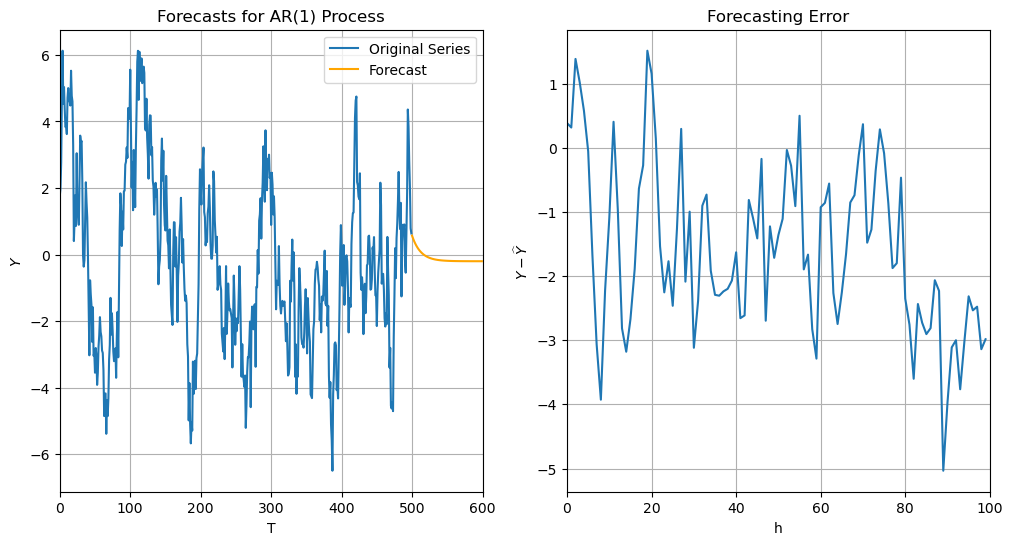

In [6]:
# Forecast for AR(1)
y_pred = forecast(ar1_data[0:500], (1, 0, 0))

err = ar1_data[500:] - y_pred

# Plot forecasts
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(ar1_data[0:500], label="Original Series")
ax[0].plot(np.arange(500, len(ar1_data)), y_pred, label="Forecast", color="orange")
ax[0].set_xlabel("T")
ax[0].set_ylabel("$Y$")
ax[0].set_xlim(0, 600)
ax[0].set_title("Forecasts for AR(1) Process")
ax[0].legend()
ax[0].grid()

ax[1].plot(np.arange(0, 100), err)
ax[1].set_xlim(0, 100)
ax[1].set_title("Forecasting Error")
ax[1].grid()
ax[1].set_xlabel("h")
ax[1].set_ylabel("$Y - \\widehat{Y}$")

plt.show()

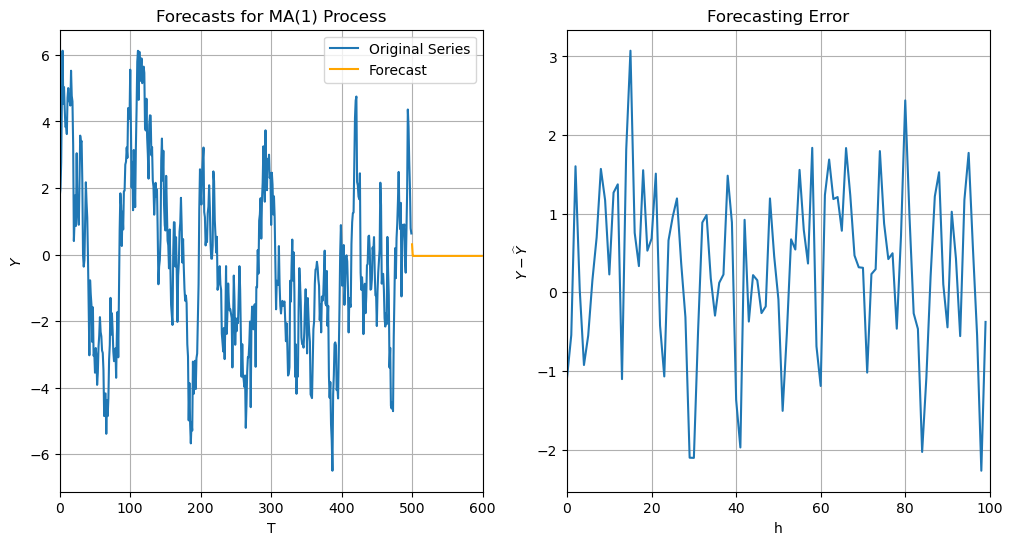

In [7]:
y_pred = forecast(ma1_data[0:500], (0, 0, 1))

err = ma1_data[500:] - y_pred

# Plot forecasts
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(ar1_data[0:500], label="Original Series")
ax[0].plot(np.arange(500, len(ar1_data)), y_pred, label="Forecast", color="orange")
ax[0].set_xlabel("T")
ax[0].set_ylabel("$Y$")
ax[0].set_xlim(0, 600)
ax[0].set_title("Forecasts for MA(1) Process")
ax[0].legend()
ax[0].grid()

ax[1].plot(np.arange(0, 100), err)
ax[1].set_xlim(0, 100)
ax[1].set_title("Forecasting Error")
ax[1].grid()
ax[1].set_xlabel("h")
ax[1].set_ylabel("$Y - \\widehat{Y}$")

plt.show()